<a href="https://colab.research.google.com/github/ashrafalaghbari/customer_churn_prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

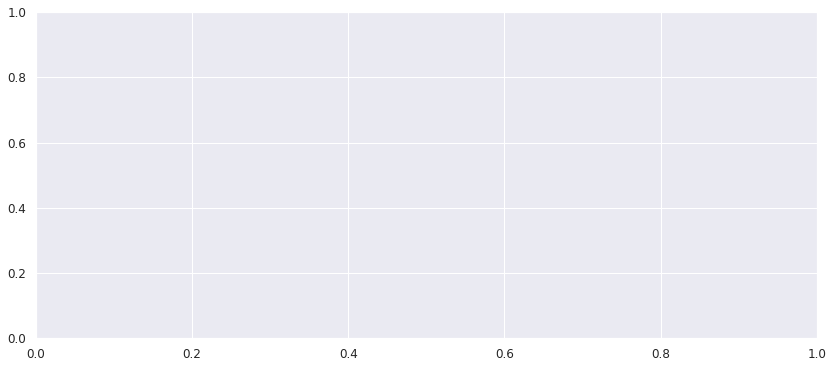

In [300]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from math import inf
# maximize the size of the labels, ticks, and figures
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 14
plt.tick_params(labelsize=12)

In [191]:
df =  pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

* **Demographic variables:** 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
* **Contracts and billing:** 'Contract', 'PaperlessBilling','PaymentMethod',
* **Additional services used:** 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
* **Customer monetary value and tenure:** 'MonthlyCharges', 'TotalCharges','tenure'
* **Churn behavior:** 'Churn'

In [192]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [194]:
# remove customerID variable 
del df['customerID']

In [195]:
# convert the data type of senior citizen to int8 so I can include in the categorical features
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int8') 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [196]:
#count both categorical and numerical columns
cat_features = df.select_dtypes(include=['object', 'int8'])
num_features = df.select_dtypes(include=['int64', 'float64'])

print(f"The number of categorical features in the DataFrame is: {cat_features.shape[1]}")
print(f"The number of numerical features in the DataFrame is: {num_features.shape[1]}")

The number of categorical features in the DataFrame is: 17
The number of numerical features in the DataFrame is: 3


In [197]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [198]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* Since the customer has a tenure of zero, they have not been using the product or service for any complete billing cycle, and therefore their total charges should be zero.

In [199]:
df.loc[df['tenure']==0, 'TotalCharges'] = 0

In [200]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [201]:
# #Encoding  categorical features with more than two categories
# df = pd.get_dummies(df, drop_first=True)

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV

predictors = df.drop(['Churn'], axis=1)
target = df['Churn']
# split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
print(f'Training set: {X_train.shape} shape')
print(f'Test set: {X_test.shape} shape')

Training set: (5634, 19) shape
Test set: (1409, 19) shape


In [203]:
# from sklearn.model_selection import train_test_split, GridSearchCV

# predictors = df.drop(['Churn_Yes'], axis=1)
# target = df['Churn_Yes']
# # split data into 80% training and 20% test sets
# X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
# print(f'Training set: {X_train.shape} shape')
# print(f'Test set: {X_test.shape} shape')

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_features.columns] = scaler.fit_transform(X_train[num_features.columns])
X_test[num_features.columns] = scaler.transform(X_test[num_features.columns])

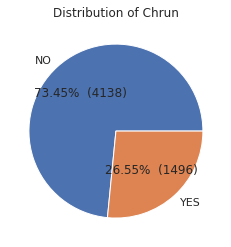

In [205]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [y_train.value_counts()[0],y_train.value_counts()[1]] 
labels = ['NO','YES'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Distribution of Chrun')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [303]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# # Random undersampling
# rus = RandomUnderSampler(random_state=42)
# X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# # Random oversampling
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# SMOTE oversampling
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


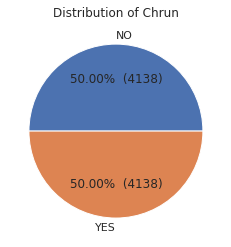

In [207]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [y_train_ros.value_counts()[0],y_train_ros.value_counts()[1]] 
labels = ['NO','YES'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Distribution of Chrun')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

# Cluster analysis

PCA works by finding the principal components of the data, which are linear combinations of the original features that explain the most variation in the data. These principal components can be used as new features in place of the original features, which can help reduce the dimensionality of the data. By reducing the dimensionality of the data using PCA, K-means can become more computationally efficient and can produce better clustering results. This is because the reduced feature space is often more informative and less noisy than the original high-dimensional feature space.

In [ ]:
! pip install prince

In [304]:
from prince import MCA
X_train_cat = X_train[cat_features.drop(['Churn'], axis=1).columns]
num_components = len(X_train_cat.columns)
mca = MCA(n_components= num_components,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
)

mca = mca.fit(X_train_cat)

The cumulative explained variance for 9 components is 0.7977585381739757


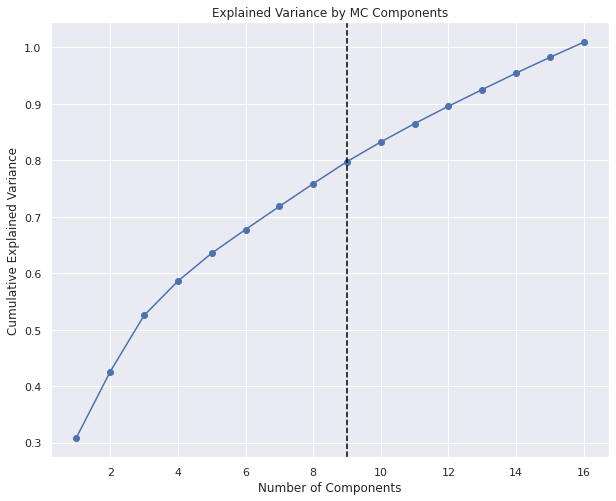

In [275]:
plt.figure(figsize = (10,8))
plt.plot(range(1,num_components+1), np.cumsum(mca.explained_inertia_), marker = 'o', linestyle = '-')
plt.title('Explained Variance by MC Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=9, color='black',linestyle = '--')
print(f'The cumulative explained variance for 9 components is {np.cumsum(mca.explained_inertia_)[8]}')

In [306]:
X_train_cat = X_train[cat_features.drop(['Churn'], axis=1).columns]
num_components = 9
mca = MCA(n_components= num_components,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
)

scores_mca = mca.fit_transform(X_train_cat)

In [307]:
df_for_cluster = pd.concat([scores_mca, X_train[num_features.columns]], axis=1)
df_for_cluster

,0,1,2,3,4,5,6,7,8,tenure,MonthlyCharges,TotalCharges
0,-0.080682,0.297859,0.311915,-0.528355,0.318457,0.473494,0.085959,0.493131,-0.188999,0.291667,0.464375,0.153924
1,-0.294710,0.212466,-0.432508,0.252145,0.136861,-0.430053,-0.533505,0.016536,0.104132,0.750000,0.786746,0.590624
2,-0.484661,-0.232300,1.078432,0.451845,-0.509292,0.094138,0.032193,-0.187796,0.083937,0.013889,0.051819,0.002700
3,-0.354591,-0.715315,-0.003371,-0.154684,-0.021935,0.108215,0.019729,-0.218578,-0.021060,0.055556,0.517688,0.027398
4,-0.222593,0.588974,0.176093,-0.620328,-0.006684,-0.278116,-0.469597,-0.467789,0.251739,0.000000,0.434978,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8271,-0.263811,-0.328243,0.073397,-0.472743,-0.185747,0.157729,0.037660,-0.239280,0.024408,0.111111,0.565521,0.072880
8272,-0.399797,0.178183,-0.468519,0.267971,-0.079921,-0.027954,-0.010357,0.200220,-0.264592,0.291667,0.853513,0.259557
8273,-0.428525,-0.377632,-0.402287,0.474455,0.001624,0.117540,0.045411,-0.240255,-0.075892,0.027778,0.753363,0.022655
8274,-0.374954,-0.170739,-0.258915,0.032619,-0.260857,-0.029375,-0.298425,-0.307811,0.475409,0.069444,0.614350,0.039604


In [ ]:
!pip install gower

In [ ]:
from gower import gower_matrix
# compute the gower distance matrix
gower_dist = gower_matrix(X_train)
gower_dist

array([[0.        , 0.40724683, 0.42805192, ..., 0.555972  , 0.38285092,
        0.4873214 ],
       [0.40724683, 0.        , 0.43529874, ..., 0.6298855 , 0.23527297,
        0.62327194],
       [0.42805192, 0.43529874, 0.        , ..., 0.34027457, 0.3348539 ,
        0.48111832],
       ...,
       [0.555972  , 0.6298855 , 0.34027457, ..., 0.        , 0.52944064,
        0.20751043],
       [0.38285092, 0.23527297, 0.3348539 , ..., 0.52944064, 0.        ,
        0.6024567 ],
       [0.4873214 , 0.62327194, 0.48111832, ..., 0.20751043, 0.6024567 ,
        0.        ]], dtype=float32)

In [288]:
from sklearn.cluster import KMeans

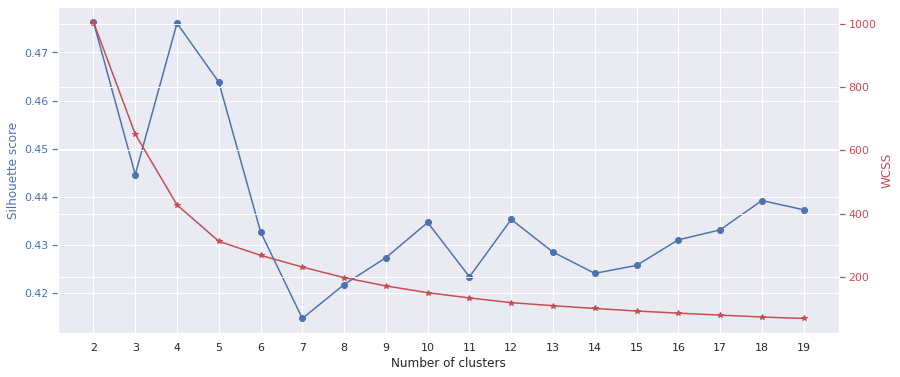

In [417]:
# compute silhouette score and WCSS for each cluster size
range_n_clusters = np.arange(2, 20)
silhouette_scores = []
wcss = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_train[num_features.columns])
    silhouette_scores.append(silhouette_score(X_train[num_features.columns], cluster_labels))
    wcss.append(kmeans.inertia_)

    

# create figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot silhouette scores on first y-axis
ax1.plot(range_n_clusters, silhouette_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette score', color='b')
ax1.tick_params('y', colors='b')

# plot WCSS on second y-axis
ax2.plot(range_n_clusters, wcss, 'r*-')
ax2.set_ylabel('WCSS', color='r')
ax2.tick_params('y', colors='r')

plt.xticks(range_n_clusters)
plt.show()




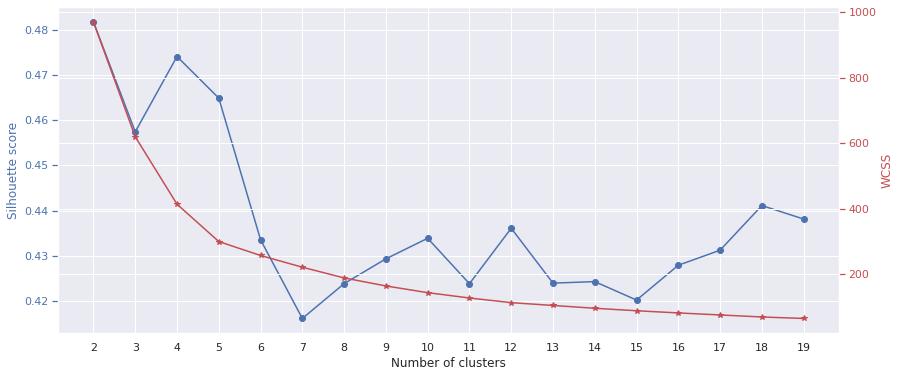

In [429]:
# compute silhouette score and WCSS for each cluster size
range_n_clusters = np.arange(2, 20)
silhouette_scores = []
wcss = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)
    silhouette_scores.append(silhouette_score(X_reduced, cluster_labels))
    wcss.append(kmeans.inertia_)

    

# create figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot silhouette scores on first y-axis
ax1.plot(range_n_clusters, silhouette_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette score', color='b')
ax1.tick_params('y', colors='b')

# plot WCSS on second y-axis
ax2.plot(range_n_clusters, wcss, 'r*-')
ax2.set_ylabel('WCSS', color='r')
ax2.tick_params('y', colors='r')

plt.xticks(range_n_clusters)
plt.show()




In [404]:
# check the rate of change in within cluster sum of squares 
wcss = np.array(wcss)
diff_scores = wcss / wcss[0]
abs(np.diff(diff_scores))

array([0.35282494, 0.22247804, 0.11457454, 0.04412428, 0.03685163,
       0.03330531, 0.02599348, 0.02137849, 0.01643602, 0.01490425,
       0.00956914, 0.00867412, 0.00800224, 0.00677825, 0.00611658,
       0.00604447, 0.00455371])

In [349]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [431]:
range_n_clusters = np.arange(2,6)
X= X_reduced

For n_clusters = 2 The average silhouette_score is : 0.481727070480921
For n_clusters = 3 The average silhouette_score is : 0.45741705823755113
For n_clusters = 4 The average silhouette_score is : 0.47408278930308717
For n_clusters = 5 The average silhouette_score is : 0.4648719986250965


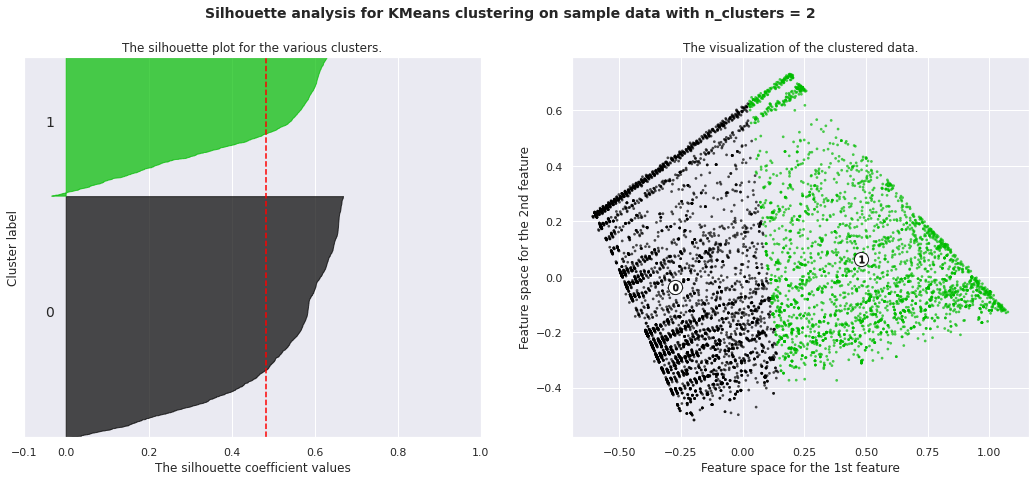

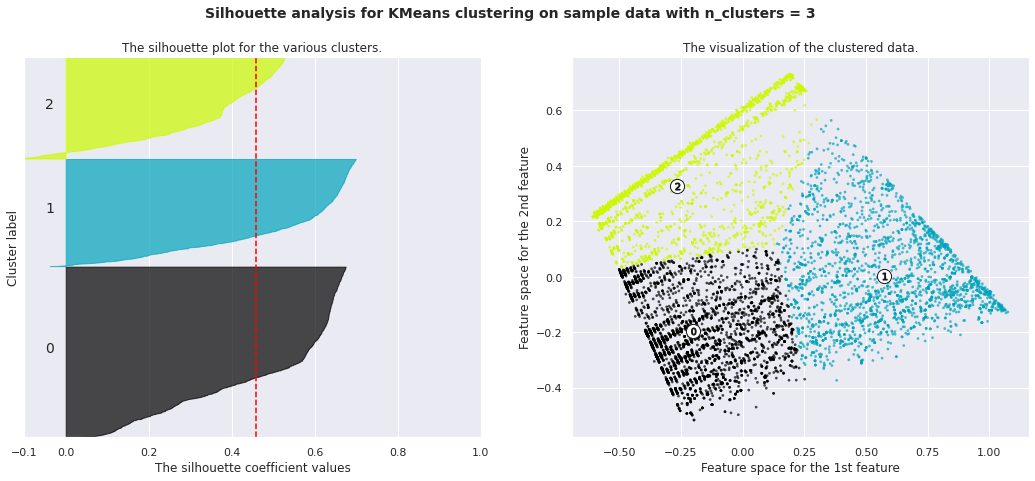

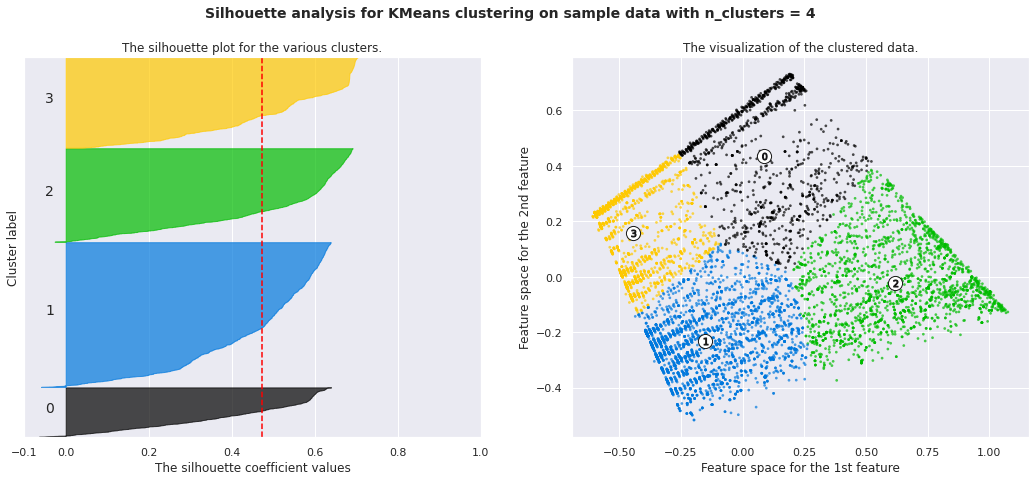

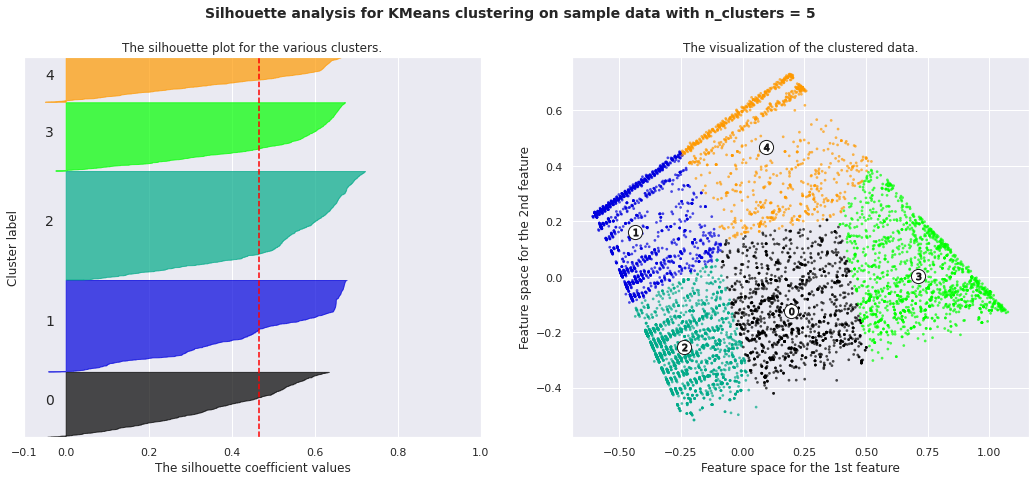

In [432]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [310]:
from sklearn.metrics import silhouette_score

In [312]:
# compute the silhouette score
silhouette_avg = silhouette_score(df_for_cluster, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.0001529937470799192


In [ ]:
# A list holds the SSE values for each k
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

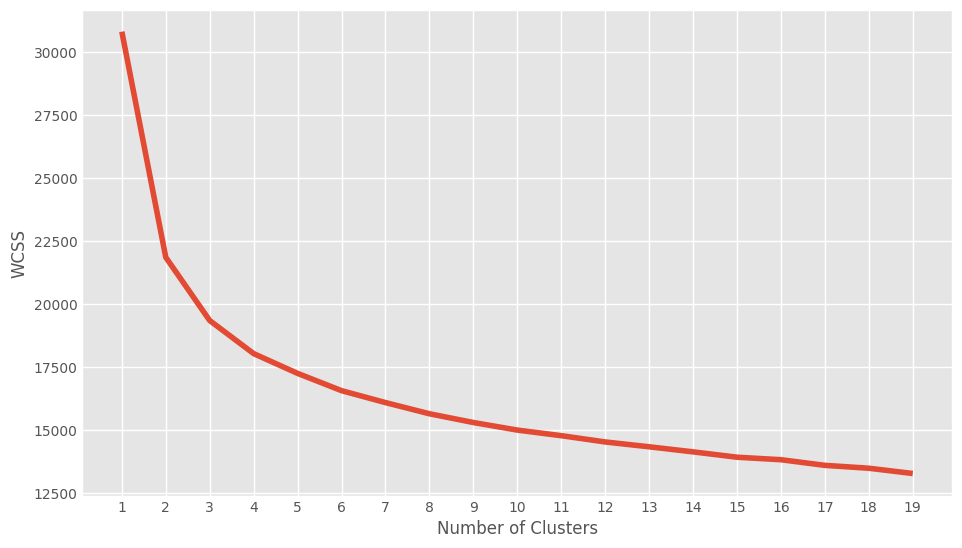

In [ ]:
plt.style.use("ggplot")
plt.plot(range(1, 20), wcss)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Develope a LR model

In [ ]:
#optimize the model
# Define hyperparameter grid
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': loguniform(1e-3, 100).rvs(size=5),
    'solver': ['liblinear', 'saga'],
    'max_iter': [400, 600]
}

# Create logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=5,
                        #    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           n_jobs=-1, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
# Access the mean and std of the test scores (accuracy) for each fold
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Access the index of the best combination
best_index = grid_search.best_index_

# Get the mean and std of thevalidation score (F1-score) for the best combination
best_mean_score = mean_scores[best_index]
best_std_score = std_scores[best_index]
# print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):'+"\033[0;0m")
print(f"\nBest combination ({grid_search.best_params_}):\nMean F1-score = {best_mean_score}, std = {best_std_score}")



Best combination ({'C': 95.28693630147656, 'max_iter': 600, 'solver': 'saga'}):
Mean F1-score = 0.5926327986427646, std = 0.013760645319364584


* The mean F1-score for the best combination of hyperparameters is 0.5876, while the standard deviation is 0.0192. This means that the F1-score varied by an average of 0.0192 across the different cross-validation folds. A low standard deviation is desirable, as it indicates that the model's performance is consistent across the different folds, and is therefore more likely to generalize well to new, unseen data. A high standard deviation, on the other hand, suggests that the model's performance may be more sensitive to the specific partitioning of the data into training and validation sets, and may not generalize as well to new data.

In [ ]:
# Evalue the predictive performance of Logistic Regression model based on the optimal hyperparameters 
lr_model = LogisticRegression(C= 95.28693630147656, max_iter = 600, solver = 'saga', random_state=42)
lr_model.fit(X_train, y_train)
# Make predictions using LR model
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_lr = classification_report(y_test, y_pred_lr)
print('Classification report for Logistic Regression model:\n', cr_lr)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



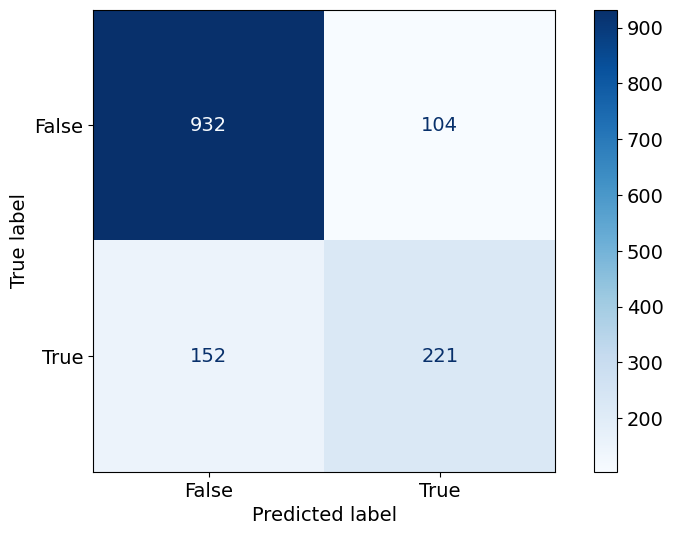

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# set plot style to ggplot2
plt.style.use('default')
# maximize the size of the labels, ticks, and figures
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
confusion_matrix = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap='Blues')
plt.show()

# Sampling Methods

In [ ]:
#optimize the model
# Define hyperparameter grid
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': loguniform(1e-3, 100).rvs(size=5),
    'solver': ['liblinear', 'saga', 'newton-cg'],
    'max_iter': [400, 600]
}

# Create logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, 
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           n_jobs=-1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_ros, y_train_ros)

# Print best hyperparameters and corresponding score
# Access the mean and std of the test scores (accuracy) for each fold
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Access the index of the best combination
best_index = grid_search.best_index_

# Get the mean and std of thevalidation score (F1-score) for the best combination
best_mean_score = mean_scores[best_index]
best_std_score = std_scores[best_index]
# print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):'+"\033[0;0m")
print(f"\nBest combination ({grid_search.best_params_}):\nMean F1-score = {best_mean_score}, std = {best_std_score}")



Best combination ({'C': 0.08400017756665068, 'max_iter': 400, 'solver': 'liblinear'}):
Mean F1-score = 0.7624450136462484, std = 0.005272096655461625


In [ ]:
# Evalue the predictive performance of Logistic Regression model based on the optimal hyperparameters 
lr_model_ros= LogisticRegression(C=  0.0840, max_iter = 400, solver = 'liblinear', random_state=42)
lr_model_ros.fit(X_train_ros, y_train_ros)
# Make predictions using LR model
y_pred_lr_ros = lr_model_ros.predict(X_test)

In [ ]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_lr = classification_report(y_test, y_pred_lr_ros)
print('Classification report for Logistic Regression model:\n', cr_lr)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



# Develope a GB model

In [ ]:

# Instantiate the GB model with hyperparameters
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb.fit(X_train_ros, y_train_ros)

# Generate predictions on the testing data
y_pred_gb = gb.predict(X_test)

In [ ]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_gb= classification_report(y_test, y_pred_gb)
print('Classification report for Gradient Boosting model:\n', cr_gb)

Classification report for Gradient Boosting model:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.76      0.78      1409



# Develope a DT model

In [ ]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_ros, y_train_ros)
# Make predictions using DT model
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate the DT model
# Calculate classification report for DT model
print('Classification report for Decision Tree model:')
print(classification_report(y_test, y_pred_dt))

Classification report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1036
           1       0.49      0.48      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



# Develope a RF model

In [ ]:
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ros, y_train_ros)
# Make predictions using RF model
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate classification report for RF model
print('Classification report for Random Forest model:')
print(classification_report(y_test, y_pred_rf))

Classification report for Random Forest model:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.60      0.57      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

